# General libraries

In [393]:
# Importing the re module (for  regular expression matching operations)
# Importing the numpy library (for arrays operations)
# Importing the pandas library (for data analysis)
# Importing the matplotlib.pyplot interface (for MATLAB-like plots)

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data
We retrieve from [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download) the csv file "IMDB Dataset.csv" consisting of 50'000 IMDB movie reviews with their corresponding positive or negative sentiment classification.

In [394]:
# Storing the csv file into a DataFrame "df"

df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [395]:
# Printing the basic properties of "df" (in particular, there are no null values in "df")

print('\033[1m' + 'df.columns:' + '\033[0m' + '\n', df.columns, '\n')
print('\033[1m' + 'df.shape:' + '\033[0m' + '\n', df.shape, '\n')
print('\033[1m' + 'df.info():' + '\033[0m')
df.info()

df.columns:
 Index(['review', 'sentiment'], dtype='object') 

df.shape:
 (50000, 2) 

df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [396]:
# Printing descriptive statistics of "df"

df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


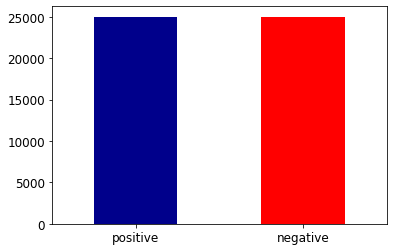

In [397]:
# Bar plot of the count of positive and negative reviews (they are equal)

df['sentiment'].value_counts().plot.bar(color=['darkblue', 'r'], rot=0, fontsize='large')
plt.show()

In [398]:
# Converting the sentiment values to integer values (positive -> 1 and negative -> 0)

df.sentiment = [1 if tag == 'positive' else 0 for tag in df.sentiment]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Data preprocessing
Using [regular expressions](https://docs.python.org/3/library/re.html), we make the following transformations to the reviews:
- remove punctuation marks
- remove HTML tags
- remove URL's
- remove characters which are not letters or digits
- convert to lower case
- remove multiple whitespaces
- strip whitespaces from the beginning and the end

In [399]:
# Storing in "review_before" an example of review before before preprocessing

review_before = df.iloc[2132][0]

# Applying the mentioned transformations to the reviews

df['review'] = df['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
df['review'] = df['review'].apply(lambda x: re.sub('<.*?>', ' ', x))
df['review'] = df['review'].apply(lambda x: re.sub('http\S+', ' ', x))
df['review'] = df['review'].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))
df['review'] = df['review'].apply(lambda x: x.lower())
df['review'] = df['review'].apply(lambda x: re.sub('\s+', ' ', x))
df['review'] = df['review'].apply(lambda x: x.strip())

In [400]:
# Printing an example of review before and after preprocessing

print('\033[1m' + 'Example of review before preprocessing:' + '\033[0m' + '\n', review_before, '\n')
print('\033[1m' + '... and after preprocessing:' + '\033[0m' + '\n', df.iloc[2132][0])

Example of review before preprocessing:
 I, too, found "Oppenheimer" to be a brilliant series and one of the finest offerings ever on American PBS. David Suchet was particularly effective as Edward Teller, as I recall, and the overall conception was spectacularly good. The only reason that the series doesn't rate a full 10/10 is for the low-budget production values in some areas. Actual content is absolutely first-rate in my recollection.<br /><br />The Oppenheimer miniseries will be released in the UK on July 31st! It will be a Region 2/PAL set, but it would seem that a Region 1/NTSC set should be soon in the offing.<br /><br />If you have a universal player in the US, you can order the series right now from Amazon UK.<br /><br />http://tinyurl.com/znyyq<br /><br />Huzzah!! 

... and after preprocessing:
 i too found oppenheimer to be a brilliant series and one of the finest offerings ever on american pbs david suchet was particularly effective as edward teller as i recall and the ove